In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-cancer-patients-2015-2024/global_cancer_patients_2015_2024.csv


# FIRST STEP: EDA

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Display plots in the notebook
%matplotlib inline


In [25]:
df = pd.read_csv('/kaggle/input/global-cancer-patients-2015-2024/global_cancer_patients_2015_2024.csv')
df.head(5) ## Show first 5 rows


,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [26]:
# Show shape of the dataset (rows, columns)
df.shape


(50000, 15)

In [27]:
# Show all column names
df.columns


Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [28]:
# Show info about columns and types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [29]:
# Count missing values in each column
df.isnull().sum()



Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

In [30]:
# Get statistical summary for numerical columns
df.describe()


,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [31]:
# Check number of duplicate rows
df.duplicated().sum()


0

In [32]:
# Check data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

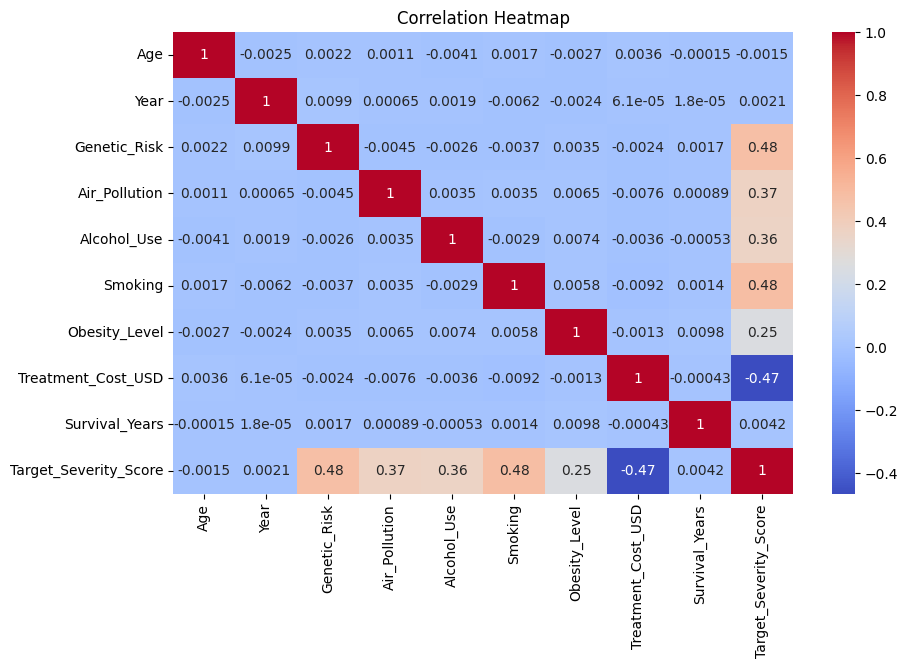

In [33]:
#Correlation Heatmap (for numeric columns):
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])  # only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [34]:
df.select_dtypes(include='number').corr()['Target_Severity_Score'].sort_values(ascending=False)


Target_Severity_Score    1.000000
Smoking                  0.484420
Genetic_Risk             0.478700
Air_Pollution            0.366963
Alcohol_Use              0.363250
Obesity_Level            0.251366
Survival_Years           0.004161
Year                     0.002109
Age                     -0.001481
Treatment_Cost_USD      -0.466058
Name: Target_Severity_Score, dtype: float64

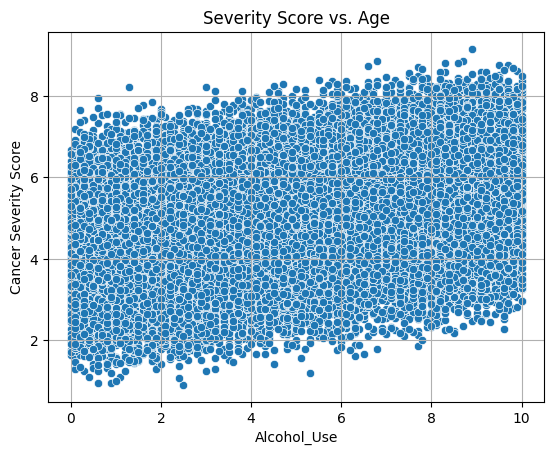

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Alcohol_Use', y='Target_Severity_Score')
plt.title('Severity Score vs. Age')
plt.xlabel('Alcohol_Use')
plt.ylabel('Cancer Severity Score')
plt.grid(True)
plt.show()


## Step 2: Pre-Process

In [36]:
df = df.drop(columns=['Patient_ID'])  # remove if Patient_ID not in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  object 
 2   Country_Region         50000 non-null  object 
 3   Year                   50000 non-null  int64  
 4   Genetic_Risk           50000 non-null  float64
 5   Air_Pollution          50000 non-null  float64
 6   Alcohol_Use            50000 non-null  float64
 7   Smoking                50000 non-null  float64
 8   Obesity_Level          50000 non-null  float64
 9   Cancer_Type            50000 non-null  object 
 10  Cancer_Stage           50000 non-null  object 
 11  Treatment_Cost_USD     50000 non-null  float64
 12  Survival_Years         50000 non-null  float64
 13  Target_Severity_Score  50000 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 5.3+ 

In [37]:
categorical_cols = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']

for col in categorical_cols:
    unique_vals = df[col].nunique()
    print(f"Column '{col}' has {unique_vals} unique categories")


Column 'Gender' has 3 unique categories
Column 'Country_Region' has 10 unique categories
Column 'Cancer_Type' has 8 unique categories
Column 'Cancer_Stage' has 5 unique categories


**Building a Neural Network with Numeric and Categorical Embeddings for Regression**# 

In [38]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten
from tensorflow.keras.models import Model


categorical_cols = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']

encoders = {}
for col in categorical_cols:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])
    encoders[col] = enc  # Save encoder if needed later


X = df.drop('Target_Severity_Score', axis=1)
y = df['Target_Severity_Score']


# First split into train and temp (25%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

# Then split temp into validation (10%) and test (15%) of original
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)


numeric_cols = [col for col in X.columns if col not in categorical_cols]

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_cols])
X_val_num = scaler.transform(X_val[numeric_cols])
X_test_num = scaler.transform(X_test[numeric_cols])






In [39]:
# Numeric input
numeric_input = Input(shape=(len(numeric_cols),), name='numeric_input')

# Embedding inputs for each categorical column
embedding_inputs = []
embeddings = []

for col in categorical_cols:
    num_unique = df[col].nunique()
    inp = Input(shape=(1,), name=f'{col}_input')
    emb = Embedding(input_dim=num_unique + 1, output_dim=min(50, num_unique//2 + 1))(inp)
    emb = Flatten()(emb)
    
    embedding_inputs.append(inp)
    embeddings.append(emb)


x = Concatenate()([numeric_input] + embeddings)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='linear')(x)  # Regression output

model = Model(inputs=[numeric_input] + embedding_inputs, outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


# Prepare training data inputs
train_inputs = {
    'numeric_input': X_train_num
}
for col in categorical_cols:
    train_inputs[f'{col}_input'] = X_train[col].values

# Same for validation and test
val_inputs = {
    'numeric_input': X_val_num
}
test_inputs = {
    'numeric_input': X_test_num
}
for col in categorical_cols:
    val_inputs[f'{col}_input'] = X_val[col].values
    test_inputs[f'{col}_input'] = X_test[col].values

history = model.fit(
    train_inputs, y_train,
    validation_data=(val_inputs, y_val),
    epochs=8,
    batch_size=32
)


Epoch 1/8
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.6244 - mae: 0.6438 - val_loss: 0.0031 - val_mae: 0.0430
Epoch 2/8
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0028 - mae: 0.0412 - val_loss: 0.0014 - val_mae: 0.0293
Epoch 3/8
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0012 - mae: 0.0269 - val_loss: 6.0433e-04 - val_mae: 0.0194
Epoch 4/8
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.2951e-04 - mae: 0.0211 - val_loss: 4.7947e-04 - val_mae: 0.0175
Epoch 5/8
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.0902e-04 - mae: 0.0194 - val_loss: 2.0914e-04 - val_mae: 0.0114
Epoch 6/8
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.2097e-04 - mae: 0.0177 - val_loss: 0.0030 - val_mae: 0.0482
Epoch 7/8
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.6106e-04 - mae: 0.0175 - val_loss: 5.8363e-04 - val_mae: 0.0207
Epoch 8/8
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.0859e-04 - mae: 0.0181 - val_loss: 1.3629e-04 - val_mae: 0.0093


In [40]:
# Evaluate using built-in Keras metrics (MSE and MAE)
test_loss, test_mae = model.evaluate(test_inputs, y_test)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

from sklearn.metrics import r2_score

# Predict on test set
y_pred = model.predict(test_inputs)

# Compute R-squared
r2 = r2_score(y_test, y_pred)
print(f"Test R²: {r2:.4f}")


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4460e-04 - mae: 0.0096
Test MSE: 0.0001
Test MAE: 0.0095
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test R²: 0.9999


In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_test.describe())  # Look at range of target
print(y_pred[:10])        # See some predicted values
print(y_test.values[:10]) # See some true target values


(37500, 13) (7500, 13) (37500,) (7500,)
count    7500.000000
mean        4.946669
std         1.192461
min         1.180000
25%         4.130000
50%         4.940000
75%         5.780000
max         8.590000
Name: Target_Severity_Score, dtype: float64
[[6.779318 ]
 [4.3786235]
 [3.8353047]
 [5.4582615]
 [4.5629   ]
 [5.825556 ]
 [5.2161627]
 [5.448925 ]
 [3.8624237]
 [3.2831185]]
[6.79 4.37 3.83 5.45 4.56 5.82 5.23 5.46 3.85 3.27]
